TASK 2:

Movie Recommendation System

Import libraries into the notebook

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('C:\\Users\This PC\\Downloads\\Movie-Recommendation-System-Dataset-main\\Movie-Recommendation-System-Dataset-main\\movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
df.tail()

,movieId,title,genres
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [60]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
df.drop(['genres'], axis=1)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015)
10325,146878,Le Grand Restaurant (1966)
10326,148238,A Very Murray Christmas (2015)
10327,148626,The Big Short (2015)


In [62]:
rate = pd.read_csv('C:\\Users\\This PC\\Downloads\\archive (1)\\ratings.csv')

In [63]:
rate.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [64]:
rate=rate.loc[:,['userId', 'movieId', 'rating']]
rate.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [65]:
df=pd.merge(df,rate)

In [66]:
df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,3.0


In [67]:
df.shape

(22404589, 5)

In [68]:
df=df.iloc[:1000000]

In [69]:
df.describe()

,movieId,userId,rating
count,1000000.000000,1000000.000000,1000000.000000
mean,43.432160,122752.903771,3.582914
std,33.810833,71685.557684,1.058259
min,1.000000,4.000000,0.500000
25%,16.000000,60256.750000,3.000000
50%,36.000000,122083.000000,4.000000
75%,62.000000,185043.000000,4.000000
max,111.000000,247753.000000,5.000000


In [70]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Usual Suspects, The (1995)                   4.318987
Taxi Driver (1976)                           4.091425
Seven (a.k.a. Se7en) (1995)                  4.062723
Persuasion (1995)                            4.048290
Braveheart (1995)                            4.033958
                                               ...   
Mr. Wrong (1996)                             2.443062
Bio-Dome (1996)                              2.410841
Dunston Checks In (1996)                     2.398662
Fair Game (1995)                             2.363158
Lawnmower Man 2: Beyond Cyberspace (1996)    2.166077
Name: rating, Length: 100, dtype: float64

In [71]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Braveheart (1995)                               61267
Toy Story (1995)                                60424
Usual Suspects, The (1995)                      53195
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)       50380
Seven (a.k.a. Se7en) (1995)                     47630
                                                ...  
Confessional, The (Confessionnal, Le) (1995)      200
Last Summer in the Hamptons (1995)                166
Lamerica (1994)                                   157
Catwalk (1996)                                    136
Wings of Courage (1995)                            70
Name: rating, Length: 100, dtype: int64

In [72]:
#data frame in which we will have rating and number of ratings column
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])

In [73]:
ratings.sort_values(by='rating',ascending=False)


,rating,number of ratings
title,,
"Usual Suspects, The (1995)",4.318987,53195
Taxi Driver (1976),4.091425,10402
Seven (a.k.a. Se7en) (1995),4.062723,47630
Persuasion (1995),4.048290,3334
Braveheart (1995),4.033958,61267
...,...,...
Mr. Wrong (1996),2.443062,2090
Bio-Dome (1996),2.410841,5636
Dunston Checks In (1996),2.398662,1046


In [74]:
ratings.describe()

,rating,number of ratings
count,100.000000,100.000000
mean,3.345576,10000.000000
std,0.441949,13221.355054
min,2.166077,70.000000
25%,3.116696,2012.750000
50%,3.355602,4328.500000
75%,3.654753,13439.500000
max,4.318987,61267.000000


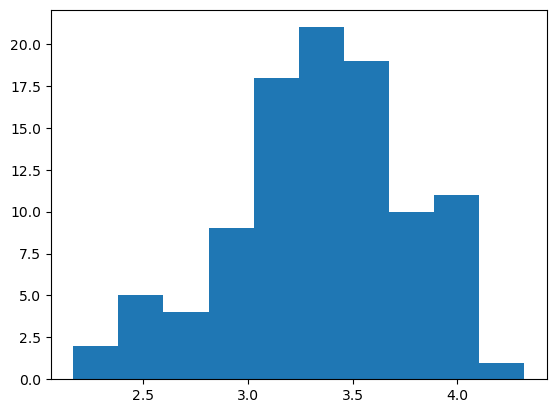

In [75]:
plt.hist(ratings['rating'])
plt.show()

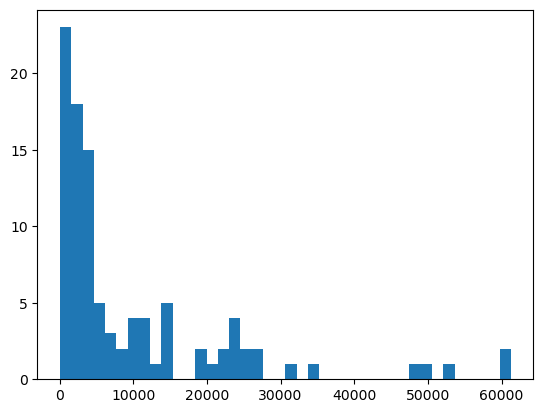

In [76]:
plt.hist(ratings['number of ratings'],bins=40)
plt.show()

In [77]:
# Making a pivot table
pivot_table=df.pivot_table(index=["userId"],columns=["title"],values="rating")
pivot_table.head()

title,Ace Ventura: When Nature Calls (1995),"American President, The (1995)",Angels and Insects (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),Balto (1995),Beautiful Girls (1996),Bed of Roses (1996),Big Bully (1996),...,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Two if by Sea (1996),Unforgettable (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995)
userId,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
pivot_table.shape

(165201, 100)

In [79]:
def recommend_movie(movie):
    movie_watched=pivot_table[movie]
    similarity_movie=pivot_table.corrwith(movie_watched)
    #find the correlation between the movies
    similarity_movie=similarity_movie.sort_values(ascending=False)
    return similarity_movie.head()

In [80]:
recommend_movie('Grumpier Old Men (1995)')

title
Grumpier Old Men (1995)               1.000000
Tom and Huck (1995)                   0.471135
Father of the Bride Part II (1995)    0.465359
Dunston Checks In (1996)              0.437768
Fair Game (1995)                      0.404419
dtype: float64